# This notebook contains the implementation of load balancing technique in cloud computing using Machine Learning.

## Import packages

In [173]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set(style="ticks", color_codes=True)


## Read the dataset


In [174]:
df = pd.read_csv("/home/sanath/Desktop/cloud_computing/dataset.csv")
df.head()

,capacity,current_load,cpu_utilization,i_o,network_in,network_out,memory_utilize,crashed
0,250,120,50,NO,34,16,65,NO
1,251,121,51,NO,35,17,66,NO
2,252,122,52,NO,36,18,67,NO
3,253,123,53,NO,37,19,68,NO
4,254,124,54,NO,38,20,69,NO


## Preprocess and label encode the dataset


In [175]:
l = LabelEncoder()
df["i_o"] = l.fit_transform(df["i_o"])
df["crashed"] = l.fit_transform(df["crashed"])
df.head()

,capacity,current_load,cpu_utilization,i_o,network_in,network_out,memory_utilize,crashed
0,250,120,50,0,34,16,65,0
1,251,121,51,0,35,17,66,0
2,252,122,52,0,36,18,67,0
3,253,123,53,0,37,19,68,0
4,254,124,54,0,38,20,69,0


## Make pair plots for analysis


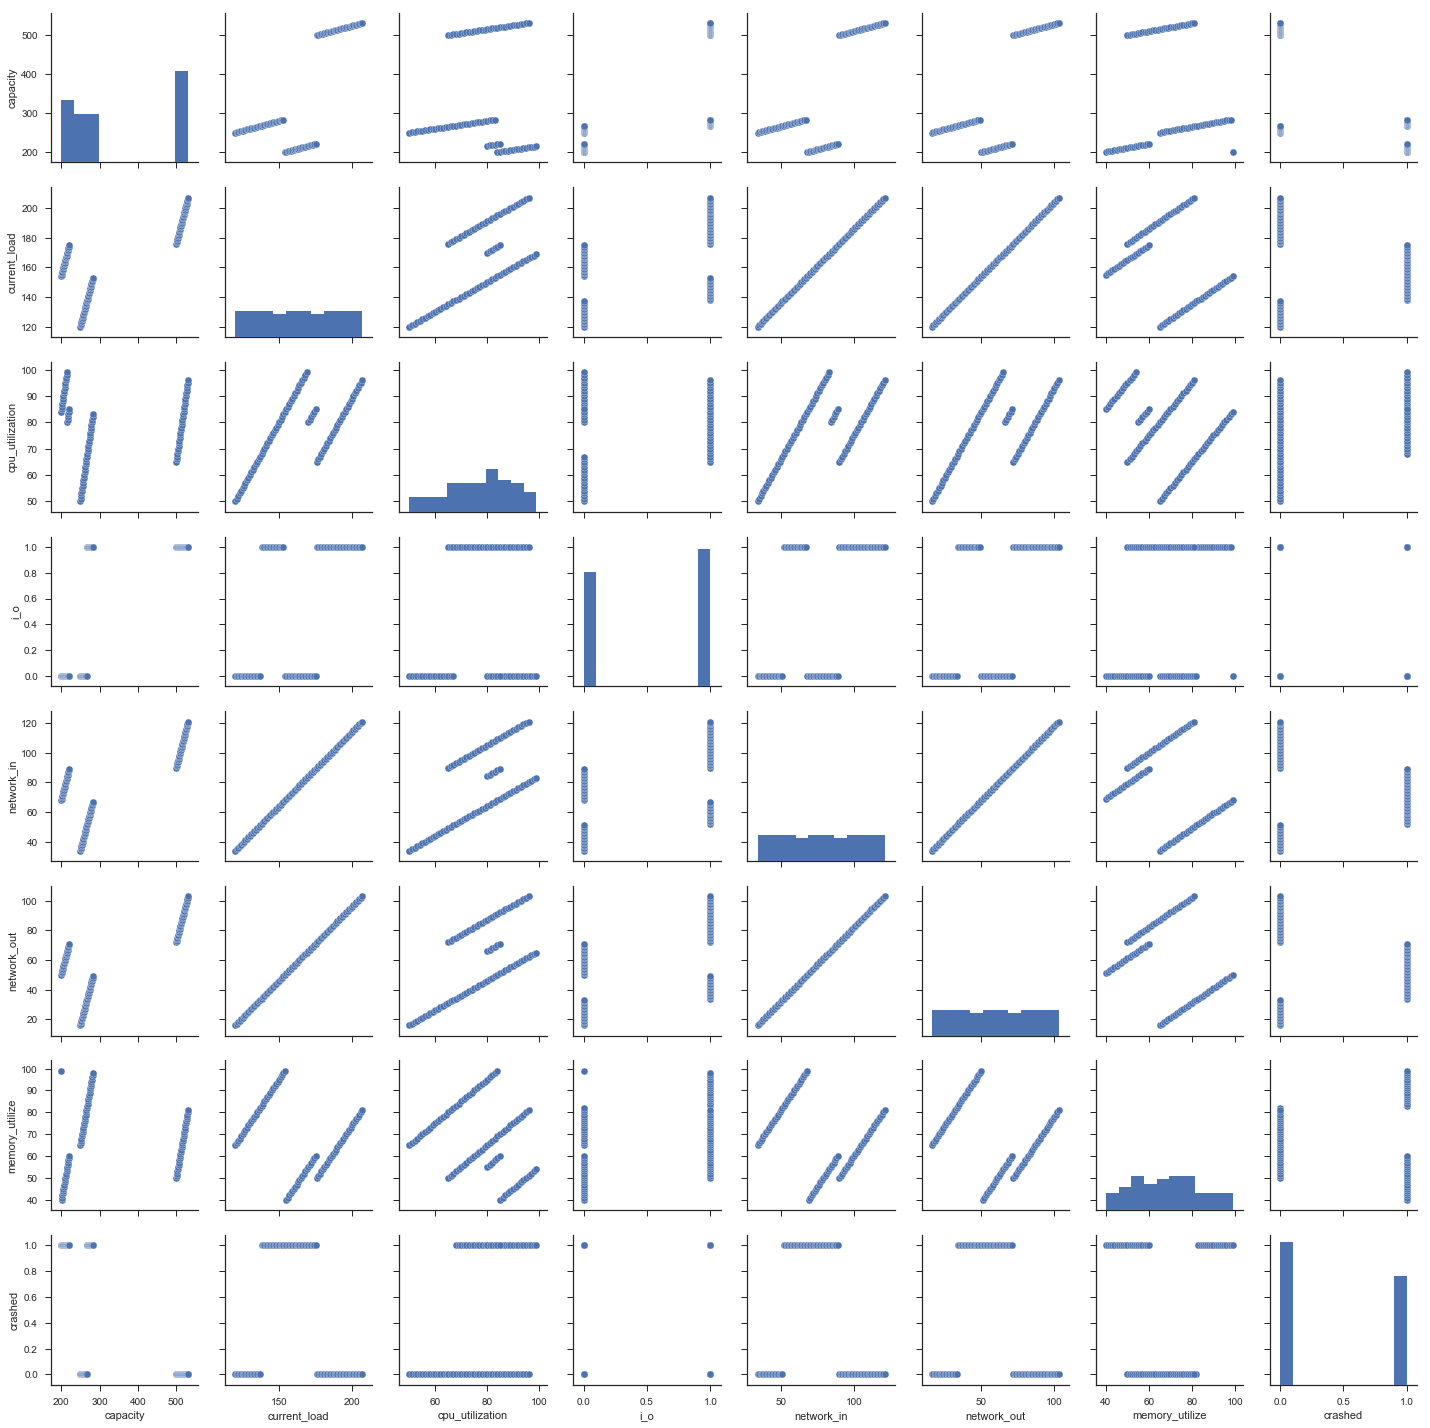

In [176]:
g = sns.pairplot(df)

## Selecting the input and output


In [177]:
X = df.loc[:, df.columns != 'crashed']
Y = df["crashed"]

## Train and Test split


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Model Building


In [179]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

## Testing the model


In [180]:
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.9666666666666667


# Assigning the request to appropriate VM (Load Balancing)


## Getting the probabilities whether the sample vms can handle the load or not


In [181]:
vms = df[17:25].loc[:, df.columns != 'crashed']
vms["i_o"] = l.fit_transform(vms["i_o"])
result = clf.predict_proba(vms).tolist()
result


[[0.46901061709273056, 0.5309893829072688],
 [0.6475850624009091, 0.35241493759909065],
 [0.49746837102956853, 0.5025316289704317],
 [0.35261862245659825, 0.6473813775434025],
 [0.23436518456475844, 0.7656348154352433],
 [0.14944565208744673, 0.8505543479125541],
 [0.0933889372525886, 0.9066110627474121],
 [0.05809744193050525, 0.9419025580694962]]

## Function to get the best VM to handle the request

In [182]:
def getBestVM(result):
    best = 1
    maxi = 0
    for i in range(len(result)):
        if(result[i][0] > maxi):
            best = i+1
            maxi = result[i][0]
    return best
        

## The id of VM to handle the request is printed

In [183]:
print("VM id : ", getBestVM(result))

VM id :  2
